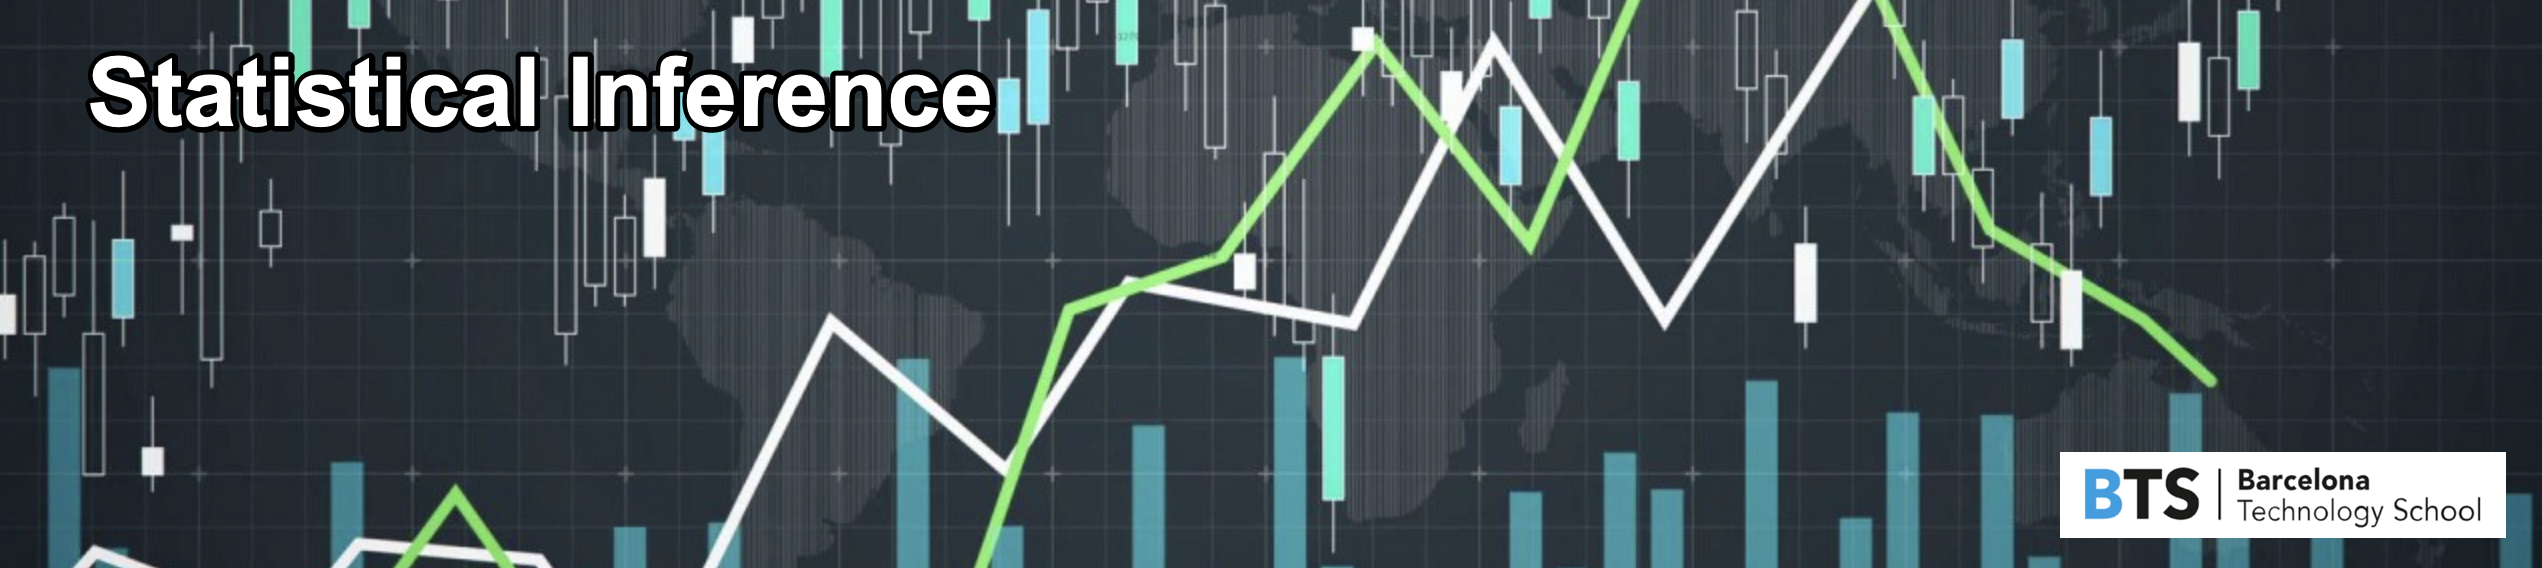

# Statistical Inference

## Exercise 1. Confidence intervals of proportions

23% of people in a country declare themselves to be smokers.\
Suppose the proportion of smokers is a dichotomous variable.

1. Simulate a sample of $n=10$ individuals (obtain 10 random values 0s and 1s with the corresponding probability of being smoker).
2. Compute the proportion $prop$ and the standard error of smokers $\sqrt{prop(1-prop)/n}$ of the sample.
3. Calculate the expected standard error of smokers $\sqrt{p(1-p)/n}$ for the specific value of the normal approximation $p$.
4. Repeate the calculation for larger sample sizes $(n=20,50,100,200,500,1000,...)$ up to 1 millon.
5. Save all the results in a table of results with $n,prop,\sigma_{prop},\sigma_{p}$.
6. Draw the computed and the calculated standard error of the proportion versus the sample size in logarithmic scale.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Smokers: Sample, Proportion, Standard Error, Expected Standard Error

In [31]:
np.random.seed(42)
n_values = [10, 20, 50, 100, 200, 500, 1000, 5000, 10000, 50000, 1000000]
p = 0.23  # Proportion of smokers

results = []

# Step 2 to Step 6: Compute and store results
for n in n_values:
    # Simulate n samples with probability p
    sample = np.random.binomial(1, p, size=n)
    if n == 10:
        print("1. Sample for n = 10:")
        print(sample) # Step 1: Sample for n = 10
        print()
    
    # Proportion of smokers in the sample
    prop = np.mean(sample)
    
    # Standard error of the sample proportion
    sigma_prop = np.sqrt(prop * (1 - prop) / n)
    
    # Expected standard error using normal approximation
    sigma_p = np.sqrt(p * (1 - p) / n)
    
    # Save results in the table
    results.append([n, prop, sigma_prop, sigma_p])

# Show the table of results
df

1. Sample for n = 10:
[0 1 0 0 0 0 0 1 0 0]



,n,prop,sigma_prop,sigma_p
0,10,0.200000,0.126491,0.133079
1,20,0.150000,0.079844,0.094101
2,50,0.300000,0.064807,0.059515
3,100,0.200000,0.040000,0.042083
4,200,0.225000,0.029528,0.029757
5,500,0.236000,0.018990,0.018820
6,1000,0.237000,0.013447,0.013308
7,5000,0.225600,0.005911,0.005951
8,10000,0.227800,0.004194,0.004208
9,50000,0.229260,0.001880,0.001882


### 2. Visualization of computed and the calculated standard error of the proportion versus the sample size in logarithmic scale

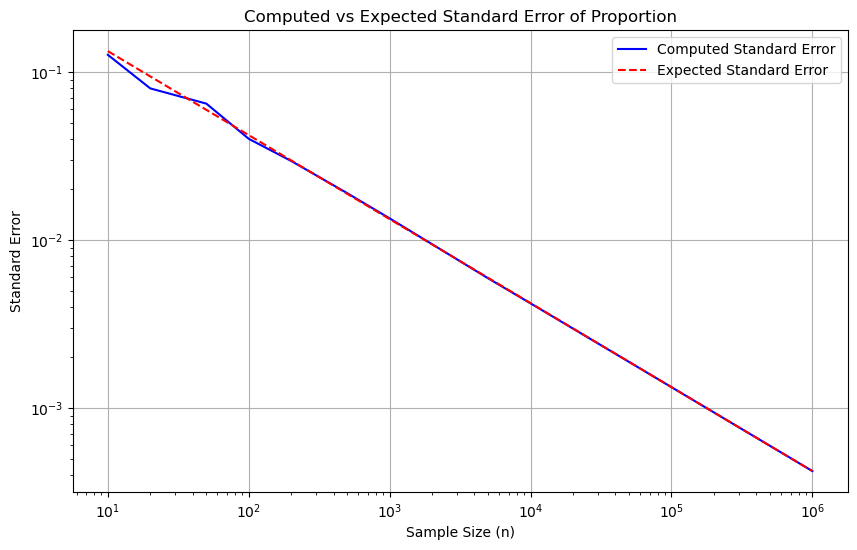

In [33]:
# Create a DataFrame
df = pd.DataFrame(results, columns=['n', 'prop', 'sigma_prop', 'sigma_p'])

# Step 6: Plot the computed and calculated standard error versus sample size
plt.figure(figsize=(10, 6))
plt.plot(df['n'], df['sigma_prop'], label='Computed Standard Error', color='b')
plt.plot(df['n'], df['sigma_p'], label='Expected Standard Error', color='r', linestyle='--')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Sample Size (n)')
plt.ylabel('Standard Error')
plt.title('Computed vs Expected Standard Error of Proportion')
plt.legend()
plt.grid(True)
plt.show()

## Exercise 2. Confidence intervals of means of quantitative variables.

Here you have a function that returns samples of size $n$ from a distribution of a numerical variable.

In [543]:
import numpy as np
from scipy.stats import norm

def get_sample(n):
    n1 = np.int_(np.ceil(n/2))
    n2 = np.int_(np.floor(n/2))
    data = norm.rvs(25,5,size=n1)
    data = np.append(data,norm.rvs(30,10,size=n2))
    return data

1. Get a sample of size 1000 and calculate the mean, the standard deviation and the standard error.
2. Draw the histogram of the data with 30 bins. Place a black vertical line at the mean.
4. Calculate the percentiles 2.5% and 97.5% of the **sample** and draw 2 vertical red lines on the histogram at these two points.
5. Calculate the confidence interval of the **mean** at a level of 95%. Place 2 vertical gray lines at low and high values.
6. Provide an estimation of the mean at a confidence level of 95%.
7. What sample size do you need if you want to estimate the mean at a confidence level of 99% with a precision of 0.1?

Mean: 27.432941932246617
Standard Deviation: 8.147017282070259
Standard Error: 0.25763130748096486


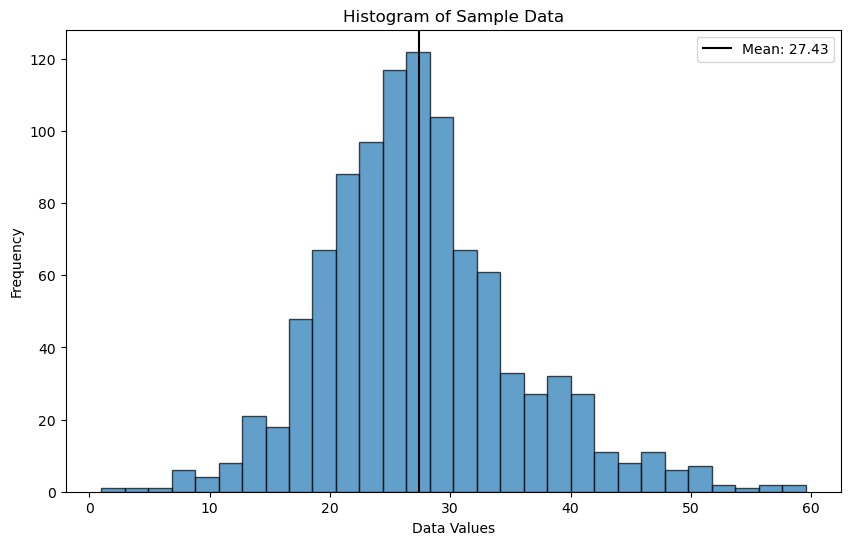

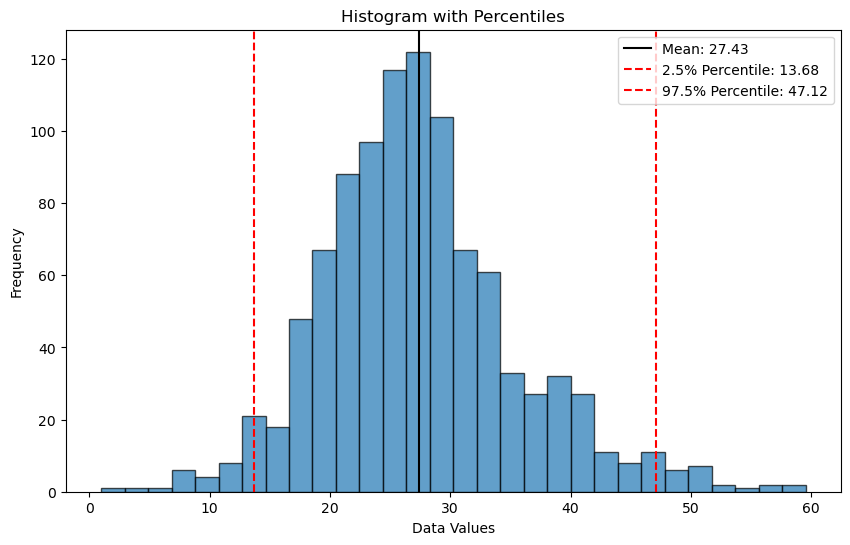

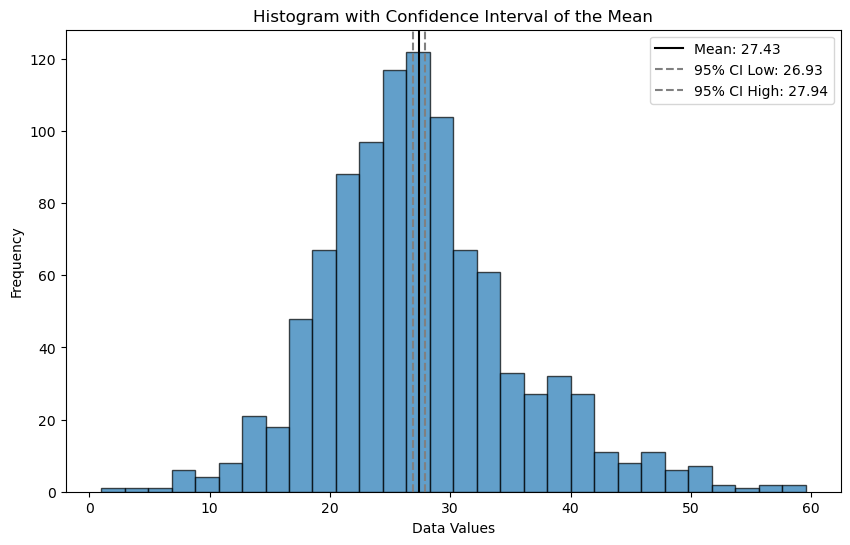

Estimation of mean 95% confidence level: (26.927993848293962, 27.937890016199272)
Sample size required: 44039.0


In [52]:
# 1: Get a sample of size 1000

n = 1000
sample = get_sample(n)

# 1: Calculate mean, standard deviation, and standard error
mean = np.mean(sample)
std_dev = np.std(sample, ddof=1)  # Sample standard deviation
std_error = std_dev / np.sqrt(n)

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")
print(f"Standard Error: {std_error}")

# 2: Draw the histogram
plt.figure(figsize=(10, 6))
plt.hist(sample, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(mean, color='k', linestyle='-', label=f'Mean: {mean:.2f}')
plt.xlabel('Data Values')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Data')
plt.legend()
plt.show()

# 3: Calculate the 2.5% and 97.5% percentiles and add red lines
percentile_2_5 = np.percentile(sample, 2.5)
percentile_97_5 = np.percentile(sample, 97.5)

plt.figure(figsize=(10, 6))
plt.hist(sample, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(mean, color='k', linestyle='-', label=f'Mean: {mean:.2f}')
plt.axvline(percentile_2_5, color='r', linestyle='--', label=f'2.5% Percentile: {percentile_2_5:.2f}')
plt.axvline(percentile_97_5, color='r', linestyle='--', label=f'97.5% Percentile: {percentile_97_5:.2f}')
plt.xlabel('Data Values')
plt.ylabel('Frequency')
plt.title('Histogram with Percentiles')
plt.legend()
plt.show()

# 4: Confidence interval of the mean at 95% level
z_critical = norm.ppf(0.975)  # 95% confidence, two-tailed
conf_interval = (mean - z_critical * std_error, mean + z_critical * std_error)

plt.figure(figsize=(10, 6))
plt.hist(sample, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(mean, color='k', linestyle='-', label=f'Mean: {mean:.2f}')
plt.axvline(conf_interval[0], color='gray', linestyle='--', label=f'95% CI Low: {conf_interval[0]:.2f}')
plt.axvline(conf_interval[1], color='gray', linestyle='--', label=f'95% CI High: {conf_interval[1]:.2f}')
plt.xlabel('Data Values')
plt.ylabel('Frequency')
plt.title('Histogram with Confidence Interval of the Mean')
plt.legend()
plt.show()

# 5: Estimation of the mean at a 95% confidence level
mean_estimation = (mean - z_critical * std_error, mean + z_critical * std_error)
print(f"Estimation of mean 95% confidence level: {mean_estimation}")

# 6: Sample size required for 99% confidence with precision 0.1
z_critical_99 = norm.ppf(0.995)  # 99% confidence
precision = 0.1
required_n = (z_critical_99 * std_dev / precision) ** 2
required_n = np.ceil(required_n)

print(f"Sample size required: {required_n}")
